In [1]:
import pandas as pd # Dataframes
import numpy as np  # Vectores
import glob         # gestionar la carga de ficheros csv con el directorio
from matplotlib import pyplot 


In [1]:
#1 Load csv de un directorio con pandas

directory = r'C:\Users\figol\OneDrive\Escritorio\git_gmane\Proyecto_DAATES\*.csv' # OJO AIXO PERQ ES UNA MERDA FERHO AIXI
files = glob.glob(directory)
listaArchivos = []
for file in files:
    listaArchivos.append(file)

names = ['id','name','geoid','geoname','value','datetime']
df_raw = pd.DataFrame(columns=names) 

i = 0
while listaArchivos:
    filename = listaArchivos.pop(0)
    df_raw_temp = pd.read_csv(filename, sep=';', names=names)
    df_raw = pd.concat([df_raw, df_raw_temp], ignore_index=True)

del i,df_raw_temp,listaArchivos,files,filename,file,directory # Elimino variables locales

NameError: name 'glob' is not defined

In [ ]:
# Otro Ejemplo con mas condiciones:

names = ['Comisionista','F.Cantidad','UN','F.Bruto','EUR','F.NetoFinal','EUR2']
df_raw = pd.read_csv('EDA_CIRWATS_30092024.csv', 
                     sep='\t+',  # Solo utiliza tabulaciones como delimitador
                     engine='python',  # Usa el motor Python para manejar expresiones regulares
                     names=names,  # Asigna los nombres de las columnas
                     skiprows=5,  # Ignora las primeras filas irrelevantes
                     encoding='ISO-8859-1')  # Evita errores de codificación

df_raw.head(20)

In [9]:
##2.1 PEAK
print("\n" + "SHAPE:")
print(df_raw.shape)

print("\n" + "VALORES NULL:")
print(df_raw.isnull().sum())

print("\n" + "VALORES UNICOS:")
print(df_raw.nunique())
print("\n")
for columna in names:
    print(f"Valores únicos en {columna}:")
    print(df_raw[columna].unique())

print("\n" + "TIPOS DE DATOS:")
print(df_raw.dtypes)



SHAPE:
(43805, 6)

VALORES NULL:
id          0
name        0
geoid       0
geoname     0
value       0
datetime    0
dtype: int64

VALORES UNICOS:
id              2
name            2
geoid           2
geoname         2
value       14922
datetime    43801
dtype: int64


Valores únicos en id:
['id' '600']
Valores únicos en name:
['name' 'Precio mercado SPOT Diario España']
Valores únicos en geoid:
['geoid' '3']
Valores únicos en geoname:
['geoname' 'España']
Valores únicos en value:
['value' '66.88' '66' ... '10.06' '63.84' '92.97']
Valores únicos en datetime:
['datetime' '2019-01-01T00:00:00+01:00' '2019-01-01T01:00:00+01:00' ...
 '2023-12-31T21:00:00+01:00' '2023-12-31T22:00:00+01:00'
 '2023-12-31T23:00:00+01:00']

TIPOS DE DATOS:
id          object
name        object
geoid       object
geoname     object
value       object
datetime    object
dtype: object


In [10]:
df_ws = df_raw

# borramos primera fila y algunas columnas

df_ws = df_ws.drop(0)
df_ws = df_ws.drop(['name','geoid','geoname','id'], axis=1)

# Vemos que el tipo de datos para value y datetime no son los correctos 

df_ws['value'] = pd.to_numeric(df_ws['value'], errors='coerce') # Casting de la variable 'value' con gestion de errores pasandolo a NA
df_ws['datetime'] = pd.to_datetime(df_ws['datetime'], errors='coerce') # Casting igual para datetime a timestamp

# Comprovamos.
print(df_ws.dtypes)
print(df_ws['value'].sample(1).iloc[0])    #Provamos un valor random con sample
print(df_ws['datetime'].sample(1).iloc[0])

print(df_ws['value'].isnull().sum())
print(df_ws['datetime'].isnull().sum())


# Filtrar valores que se convierten en NA después de la conversión
tmp_a = (df_ws[pd.to_numeric(df_ws['value'], errors='coerce').isna()])
tmp_b = (df_ws[pd.to_datetime(df_ws['datetime'], errors='coerce').isna()])
print (tmp_a)
print(tmp_b)

print("Value")
print(df_ws.iloc[8761:35044])
print("timestamp")
print(df_ws.iloc[2139:42270])

value       float64
datetime     object
dtype: object
46.36
2022-07-20 14:00:00+02:00
4
4
       value datetime
8761     NaN      NaT
17522    NaN      NaT
26283    NaN      NaT
35044    NaN      NaT
       value                   datetime
2139   48.00  2019-03-31 03:00:00+02:00
2140   46.91  2019-03-31 04:00:00+02:00
2141   48.97  2019-03-31 05:00:00+02:00
2142   50.53  2019-03-31 06:00:00+02:00
2143   46.91  2019-03-31 07:00:00+02:00
...      ...                        ...
42266  14.00  2023-10-28 22:00:00+02:00
42267   4.30  2023-10-28 23:00:00+02:00
42268   4.30  2023-10-29 00:00:00+02:00
42269   1.38  2023-10-29 01:00:00+02:00
42270   0.02  2023-10-29 02:00:00+02:00

[25708 rows x 2 columns]
Value
       value                   datetime
8762   41.88  2020-01-01 00:00:00+01:00
8763   38.60  2020-01-01 01:00:00+01:00
8764   36.55  2020-01-01 02:00:00+01:00
8765   32.32  2020-01-01 03:00:00+01:00
8766   30.85  2020-01-01 04:00:00+01:00
...      ...                        ...
35040   

C:\Users\figol\AppData\Local\Temp\ipykernel_18312\912215050.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_ws['datetime'] = pd.to_datetime(df_ws['datetime'], errors='coerce') # Casting igual para datetime a timestamp




            value  datetime
value     1.00000   0.36664
datetime  0.36664   1.00000


             value  datetime      year     month       day
value     1.000000  0.366640  0.377638  0.013810 -0.044973
datetime  0.366640  1.000000  0.962961  0.271027  0.007247
year      0.377638  0.962961  1.000000  0.001953 -0.027023
month     0.013810  0.271027  0.001953  1.000000  0.063398
day      -0.044973  0.007247 -0.027023  0.063398  1.000000


Axes(0.125,0.11;0.775x0.77)


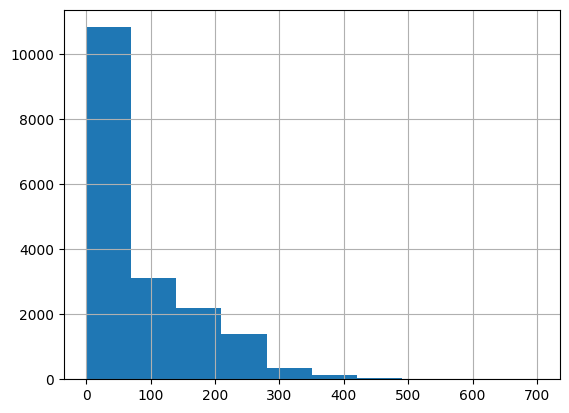

Axes(0.125,0.11;0.775x0.77)


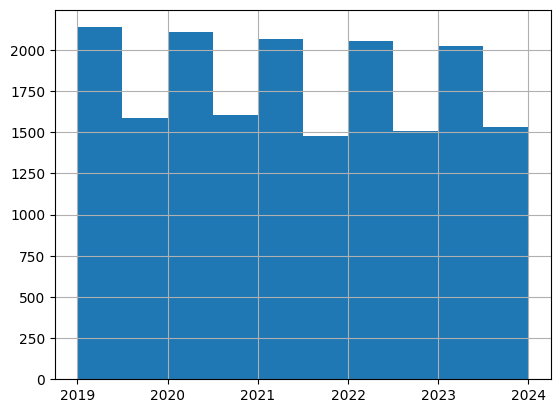

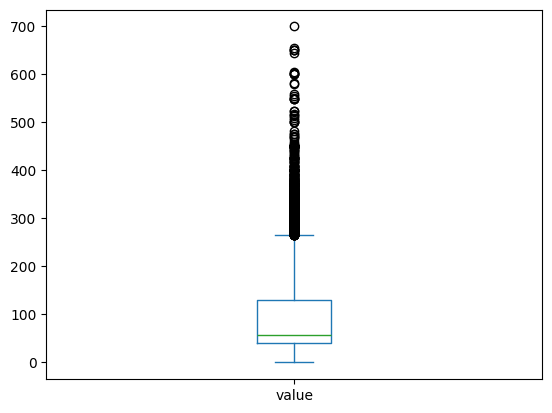

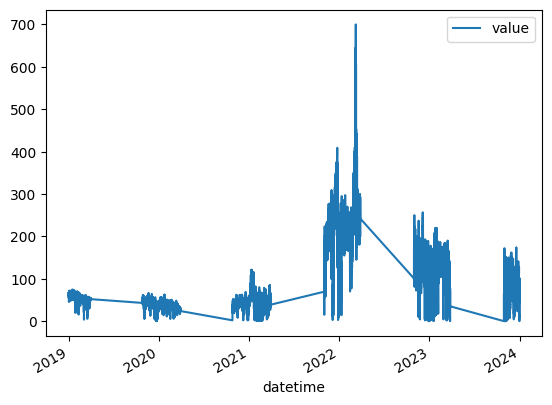

In [36]:
# TASK 1) EDA:
from matplotlib import pyplot

df_task1 = df_raw

df_task1['value'] = pd.to_numeric(df_task1['value'], errors='coerce') # Casting de la variable 'value' con gestion de errores pasandolo a NA
df_task1['datetime'] = pd.to_datetime(df_task1['datetime'], errors='coerce') # Casting igual para datetime a timestamp

df_task1 = df_task1.drop(['name','geoid','geoname','id'], axis=1)
df_task1 = df_task1.drop(0)
df_task1 = df_task1.dropna()

print("\n")
print(df_task1.corr(method='pearson'))

# Crear columnas para año, mes y día
df_task1['year'] = df_task1['datetime'].dt.year
df_task1['month'] = df_task1['datetime'].dt.month
df_task1['day'] = df_task1['datetime'].dt.day

print("\n")
print(df_task1.corr(method='pearson'))

print("\n")
print(df_task1['value'].hist())
pyplot.show()
print(df_task1['datetime'].hist())
pyplot.show()

print("\n")
df_task1['value'].plot(kind='box')
pyplot.show()
df_task1.plot(x='datetime', y='value', kind='line')
pyplot.show()

#df_task1 = df_task1.drop(['datetime'])
#print(df_task1.plot(kind='density', subplots=True, layout=(3,3), sharex=False))
pyplot.show()
